In [18]:
# importing libreries 

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [19]:
# read the excel file
furniture = pd.read_excel(r"C:\Users\User\Downloads\Sample - Superstore (3).xls")
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Preprocessing

In [21]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [22]:
# Sort the Order Date 
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

In [23]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [24]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [25]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

### Data Visualization

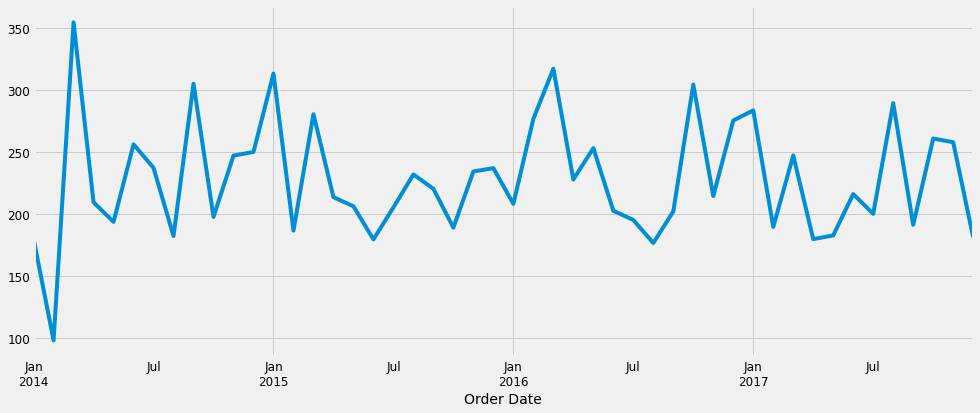

In [26]:
y.plot(figsize = (15, 6))
plt.show()

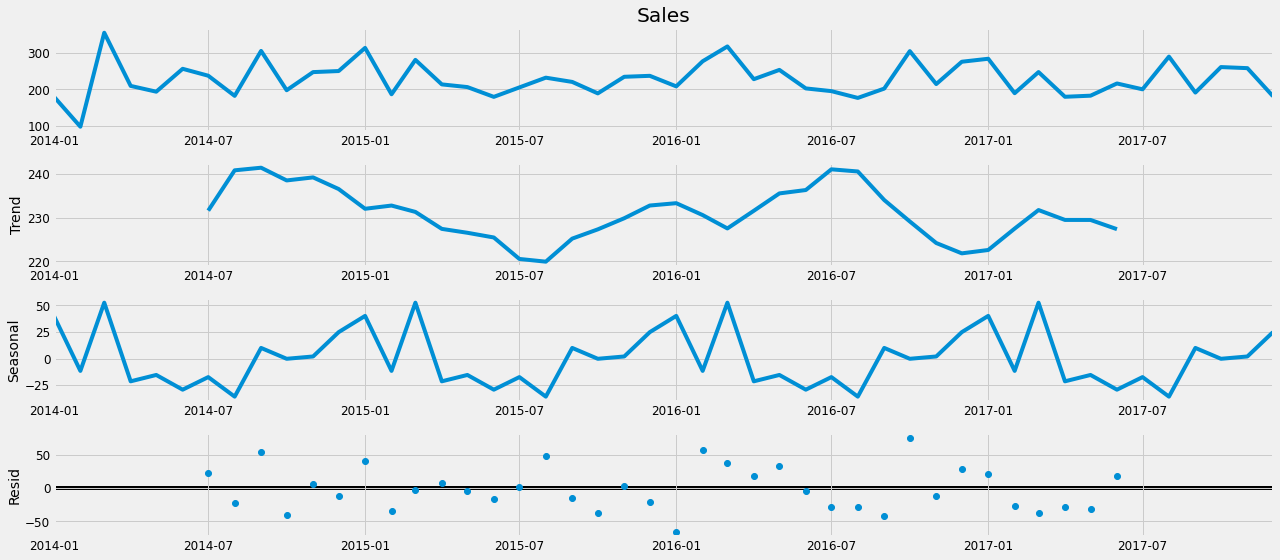

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA model

About ARIMA model

<li> ARIMA stands for Autoregressive Integreted Moving Average
<li> ARIMA models are denoted with the notation ARIMA(p, d, q)
<li> These three parameters account for seasonality, trend, and noise in data

In [28]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda 3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2430.0930072671877
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479221
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.8202649808122
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131277075
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702891445234
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.73870136529854
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987676
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670705


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2311.59573239222
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.0572383632106
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.307390308365
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871069281
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641113006255
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484385848
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.1166245099358
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537606


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1937.8984336058584
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987151914
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.7711868200247
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055302


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2168.98143515537
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.15022415993735
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.03496187200517
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718212


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1900.229716837338
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108397683
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.2311417946094
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851316


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2253.5826805721517
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.09332875533914
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684788552
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048915232


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2383.861106656234
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.06203007562175
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.3808815178685
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949779
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727756
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.27571034278367
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.1471414739083


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9354512875109


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2128.9560076274233
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128346927
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.07526374472343


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7207134237328
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.5101836747579
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.08182424063244
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379166348
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467316


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1933.9354856084897
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.0593708051508
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.6717666867994
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870476


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2207.188368458714
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.85308065730237
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.4986581218244
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933263


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1984.821650915166
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.5619008071298
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.0251886261702
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.5224773702296


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1951.329341820668
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.84819876437365
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.8117139869251


### Fitting the ARIMA model

In [30]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1392   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


C:\Users\User\anaconda 3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


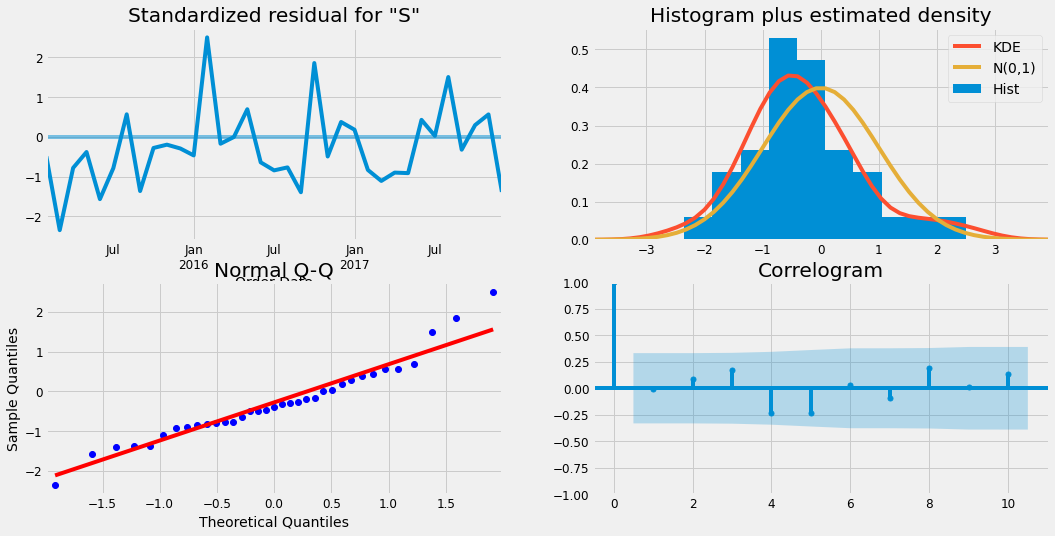

In [31]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

In [32]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

C:\Users\User\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949832,380.855434
2017-02-01,128.374778,341.873712
2017-03-01,201.126556,414.265413
2017-04-01,122.357192,335.174992
2017-05-01,126.153432,338.683177
2017-06-01,87.013283,299.283137
2017-07-01,92.953018,304.987209
2017-08-01,102.323362,314.142880
2017-09-01,103.098062,314.721215


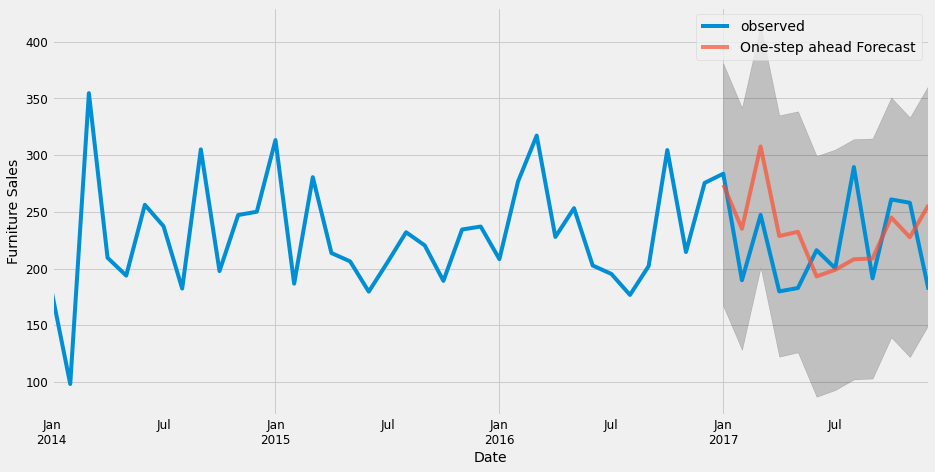

In [33]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [34]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


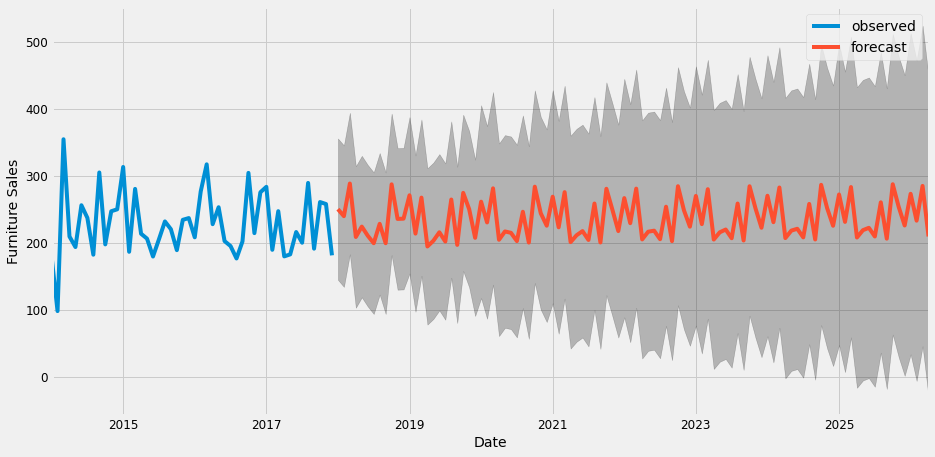

In [35]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

#### Summary
<li> Our model clearly captured furniture sales seasonality.
<li> As we forecast further out into the future, it is natural for us to become less confident in our values.
<li> This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.